In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
# read the data from the csv file
df = pd.read_csv("data/final_dataset.csv")

## Cleaning

In [89]:
df = df.drop(columns=["Unnamed: 0"])
# remove duplicates
df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2636 entries, 0 to 2635
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   VPN                   2636 non-null   object
 1   Date                  2636 non-null   object
 2   Depart                2636 non-null   object
 3   Arrivé                2636 non-null   object
 4   Prix                  2636 non-null   object
 5   Temps de vol          2636 non-null   object
 6   Heure de départ       2636 non-null   object
 7   Heure d'arrivé        2636 non-null   object
 8   Nombre d'escales      2636 non-null   object
 9   Compagnies            2636 non-null   object
 10  PIB par habitant ($)  2636 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 226.7+ KB


In [90]:
# convert $ to €
df["PIB par habitant (€)"] = df["PIB par habitant ($)"] * 0.84
df=df.drop("PIB par habitant ($)",axis=1)

### Pour visualier le prix des vols en fonction du VPN

In [91]:
df["Depart"][0]

'Aéroport de Paris Charles de Gaulle, Paris, France'

In [92]:
df["Date"] = df["Date"].astype("datetime64")

c:\Users\julie\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '30/01/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\julie\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '31/01/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)


In [93]:
# remove the € in df["Prix"]
df["Prix"] = df["Prix"].apply(lambda x: x.replace(" €", ""))
df["Prix"] = df["Prix"].apply(lambda x: x.replace(" ", ""))
df["Prix"] = df["Prix"].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2636 entries, 0 to 2635
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   VPN                   2636 non-null   object        
 1   Date                  2636 non-null   datetime64[ns]
 2   Depart                2636 non-null   object        
 3   Arrivé                2636 non-null   object        
 4   Prix                  2636 non-null   int32         
 5   Temps de vol          2636 non-null   object        
 6   Heure de départ       2636 non-null   object        
 7   Heure d'arrivé        2636 non-null   object        
 8   Nombre d'escales      2636 non-null   object        
 9   Compagnies            2636 non-null   object        
 10  PIB par habitant (€)  2636 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(8)
memory usage: 216.4+ KB


In [94]:
# Extract the last word from depart
df["Depart_pays"] = df["Depart"].apply(lambda x: x.split(",")[-1])
df["Arrivé_pays"] = df["Arrivé"].apply(lambda x: x.split(",")[-1])

df["Depart_Arrive"]=""
for i in range(len(df)):
    df["Depart_Arrive"][i] = str(df["Depart_pays"][i]) + " to" + str(df["Arrivé_pays"][i])
df.head(2)


C:\Users\julie\AppData\Local\Temp\ipykernel_14412\1609737416.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Depart_Arrive"][i] = str(df["Depart_pays"][i]) + " to" + str(df["Arrivé_pays"][i])


,VPN,Date,Depart,Arrivé,Prix,Temps de vol,Heure de départ,Heure d'arrivé,Nombre d'escales,Compagnies,PIB par habitant (€),Depart_pays,Arrivé_pays,Depart_Arrive
0,Cambodge,2023-01-30,"Aéroport de Paris Charles de Gaulle, Paris, Fr...","Aéroport Kingsford Smith de Sydney, Sydney, No...",908,33h 0m,12:30,07:30,2 escales,Plusieurs compagnies,3360.0,France,Australie,France to Australie
1,Cambodge,2023-01-30,"Aéroport de Paris Charles de Gaulle, Paris, Fr...","Aéroport Kingsford Smith de Sydney, Sydney, No...",1537,25h 10m,21:00,08:10,1 escale,Air India,3360.0,France,Australie,France to Australie


In [95]:
# Sort the data by date, Depart, Arrival, and time
df_sorted = df.groupby(by=['Date', 'Depart', 'Arrivé', 'Temps de vol',
       'Heure de départ', "Heure d'arrivé", "Nombre d'escales", 'Compagnies',"Depart_pays","Arrivé_pays"])["Prix", "VPN"].agg(lambda x:x.tolist()).reset_index()

df_sorted.head(3)

C:\Users\julie\AppData\Local\Temp\ipykernel_14412\1697917026.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sorted = df.groupby(by=['Date', 'Depart', 'Arrivé', 'Temps de vol',


,Date,Depart,Arrivé,Temps de vol,Heure de départ,Heure d'arrivé,Nombre d'escales,Compagnies,Depart_pays,Arrivé_pays,Prix,VPN
0,2023-01-30,"Aéroport Adolfo-Suárez de Madrid-Barajas, Madr...",Aéroport international Reina Sofía de Tenerife...,10h 15m,08:15,17:30,1 escale,Ryanair,Espagne,Espagne,"[67, 66, 66, 66, 66]","[Inde, Moldavie, Philippines, Liechtenstein, M..."
1,2023-01-30,"Aéroport Adolfo-Suárez de Madrid-Barajas, Madr...",Aéroport international Reina Sofía de Tenerife...,11h 45m,22:20,09:05,1 escale,Vueling,Espagne,Espagne,"[51, 51, 51, 51, 51, 51, 51, 51, 51, 51]","[Cambodge, Bangladesh, Inde, Moldavie, Philipp..."
2,2023-01-30,"Aéroport Adolfo-Suárez de Madrid-Barajas, Madr...",Aéroport international Reina Sofía de Tenerife...,11h 5m,07:30,17:35,1 escale,Plusieurs compagnies,Espagne,Espagne,"[63, 63, 63]","[Bangladesh, Luxembourg, Monaco]"


In [96]:
# Show a Depart == "Aéroport de Paris Charles de Gaulle, Paris, France"
df_sorted[df_sorted["Arrivé"]=="Aéroport international de Narita, Tokyo, Japon"].head(3)

,Date,Depart,Arrivé,Temps de vol,Heure de départ,Heure d'arrivé,Nombre d'escales,Compagnies,Depart_pays,Arrivé_pays,Prix,VPN
65,2023-01-30,"Aéroport de Paris Charles de Gaulle, Paris, Fr...","Aéroport international de Narita, Tokyo, Japon",13h 45m,11:25,09:10,Direct,Air France,France,Japon,"[765, 765, 765, 759, 765, 764, 765, 765, 765]","[Cambodge, Inde, Moldavie, Philippines, Liecht..."
66,2023-01-30,"Aéroport de Paris Charles de Gaulle, Paris, Fr...","Aéroport international de Narita, Tokyo, Japon",18h 35m,15:20,17:55,1 escale,Qatar Airways,France,Japon,"[779, 781, 786, 774, 784, 779, 783, 783, 785]","[Cambodge, Inde, Moldavie, Philippines, Liecht..."
67,2023-01-30,"Aéroport de Paris Charles de Gaulle, Paris, Fr...","Aéroport international de Narita, Tokyo, Japon",18h 55m,14:25,17:20,1 escale,Emirates,France,Japon,"[801, 801, 801, 796, 801, 801, 801, 801, 801]","[Cambodge, Inde, Moldavie, Philippines, Liecht..."


In [97]:
df_sorted["Nb_vols"]=0
for i in range(len(df_sorted)):
    df_sorted["Nb_vols"][i]= len(df_sorted["Prix"][i])

C:\Users\julie\AppData\Local\Temp\ipykernel_14412\2925145147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted["Nb_vols"][i]= len(df_sorted["Prix"][i])


In [98]:
# df_sorted["Nombre_vols_pour_ce_voyage"]= df_sorted.groupby(by=["Date","Depart","Arrivé"])["Temps de vol"].count().reset_index()
df_sorted_nb_vols = df_sorted.groupby(by=["Date","Depart","Arrivé", "Depart_pays","Arrivé_pays"])["Temps de vol"].count().reset_index()
df_sorted_nb_vols

,Date,Depart,Arrivé,Depart_pays,Arrivé_pays,Temps de vol
0,2023-01-30,"Aéroport Adolfo-Suárez de Madrid-Barajas, Madr...",Aéroport international Reina Sofía de Tenerife...,Espagne,Espagne,19
1,2023-01-30,"Aéroport Léonard de Vinci de Rome-Fiumicino, R...","Aéroport international OR Tambo, Johannesbourg...",Italie,Afrique du sud,29
2,2023-01-30,"Aéroport de Paris Charles de Gaulle, Paris, Fr...","Aéroport Kingsford Smith de Sydney, Sydney, No...",France,Australie,17
3,2023-01-30,"Aéroport de Paris Charles de Gaulle, Paris, Fr...","Aéroport international de Narita, Tokyo, Japon",France,Japon,21
4,2023-01-30,"Aéroport international John F. Kennedy, New Yo...","Aéroport international de Los Angeles, Los Ang...",Etats-Unis,Etats-Unis,16
5,2023-01-30,Aéroport international Mohammed-V de Casablanc...,"Aéroport international de Gatwick, Londres, An...",Maroc,Royaume-Uni,16
6,2023-01-30,"Aéroport international Pearson de Toronto, Tor...",Aéroport international d'Athènes Elefthérios-V...,Canada,Grèce,17
7,2023-01-30,"Aéroport international de Riga, Riga, Lettonie","Vienna Schwechat International Airport, Vienne...",Lettonie,Autriche,17
8,2023-01-30,"Aéroport international du Caire, Le Caire, Egypte","Chhatrapati Shivaji International Airport, Mum...",Egypte,Inde,15
9,2023-01-31,"Aéroport Adolfo-Suárez de Madrid-Barajas, Madr...",Aéroport international Reina Sofía de Tenerife...,Espagne,Espagne,16


### Pour visualiser le prix moyen en fonction du VPN - legende voyage

In [99]:
# Sort the data by date, Depart, Arrival, and time
df_sorted_by_trip = df.groupby(by=["VPN",'Depart', 'Arrivé', "Depart_pays","Arrivé_pays","Depart_Arrive"]).mean("Prix").reset_index()
df_sorted_by_trip

,VPN,Depart,Arrivé,Depart_pays,Arrivé_pays,Depart_Arrive,Prix,PIB par habitant (€)
0,Bangladesh,"Aéroport Adolfo-Suárez de Madrid-Barajas, Madr...",Aéroport international Reina Sofía de Tenerife...,Espagne,Espagne,Espagne to Espagne,63.000000,3528.0
1,Bangladesh,"Aéroport Léonard de Vinci de Rome-Fiumicino, R...","Aéroport international OR Tambo, Johannesbourg...",Italie,Afrique du sud,Italie to Afrique du sud,511.966667,3528.0
2,Bangladesh,"Aéroport de Paris Charles de Gaulle, Paris, Fr...","Aéroport Kingsford Smith de Sydney, Sydney, No...",France,Australie,France to Australie,1345.433333,3528.0
3,Bangladesh,"Aéroport de Paris Charles de Gaulle, Paris, Fr...","Aéroport international de Narita, Tokyo, Japon",France,Japon,France to Japon,590.666667,3528.0
4,Bangladesh,"Aéroport international John F. Kennedy, New Yo...","Aéroport international de Los Angeles, Los Ang...",Etats-Unis,Etats-Unis,Etats-Unis to Etats-Unis,109.566667,3528.0
...,...,...,...,...,...,...,...,...
85,Qatar,"Aéroport international John F. Kennedy, New Yo...","Aéroport international de Los Angeles, Los Ang...",Etats-Unis,Etats-Unis,Etats-Unis to Etats-Unis,109.300000,104916.0
86,Qatar,Aéroport international Mohammed-V de Casablanc...,"Aéroport international de Gatwick, Londres, An...",Maroc,Royaume-Uni,Maroc to Royaume-Uni,161.333333,104916.0
87,Qatar,"Aéroport international Pearson de Toronto, Tor...",Aéroport international d'Athènes Elefthérios-V...,Canada,Grèce,Canada to Grèce,478.857143,104916.0
88,Qatar,"Aéroport international de Riga, Riga, Lettonie","Vienna Schwechat International Airport, Vienne...",Lettonie,Autriche,Lettonie to Autriche,82.466667,104916.0


### Evolution du prix moyen VS PIB

In [103]:
df_sorted_by_trip_and_PIB = df.groupby(by=["VPN",'Depart', 'Arrivé', "Depart_Arrive","PIB par habitant (€)"]).mean("Prix").reset_index()
# Sort
df_sorted_by_trip_and_PIB.sort_values(by='PIB par habitant (€)', inplace=True, ignore_index=True)
df_sorted_by_trip_and_PIB

,VPN,Depart,Arrivé,Depart_Arrive,PIB par habitant (€),Prix
0,Cambodge,"Aéroport de Paris Charles de Gaulle, Paris, Fr...","Aéroport international de Narita, Tokyo, Japon",France to Japon,3360.0,647.833333
1,Cambodge,"Aéroport international du Caire, Le Caire, Egypte","Chhatrapati Shivaji International Airport, Mum...",Egypte to Inde,3360.0,249.900000
2,Cambodge,"Aéroport international de Riga, Riga, Lettonie","Vienna Schwechat International Airport, Vienne...",Lettonie to Autriche,3360.0,81.266667
3,Cambodge,"Aéroport international Pearson de Toronto, Tor...",Aéroport international d'Athènes Elefthérios-V...,Canada to Grèce,3360.0,484.200000
4,Cambodge,Aéroport international Mohammed-V de Casablanc...,"Aéroport international de Gatwick, Londres, An...",Maroc to Royaume-Uni,3360.0,165.533333
...,...,...,...,...,...,...
85,Liechtenstein,"Aéroport international Pearson de Toronto, Tor...",Aéroport international d'Athènes Elefthérios-V...,Canada to Grèce,116844.0,478.241379
86,Liechtenstein,"Aéroport international de Riga, Riga, Lettonie","Vienna Schwechat International Airport, Vienne...",Lettonie to Autriche,116844.0,79.200000
87,Liechtenstein,"Aéroport international du Caire, Le Caire, Egypte","Chhatrapati Shivaji International Airport, Mum...",Egypte to Inde,116844.0,244.633333
88,Liechtenstein,"Aéroport Léonard de Vinci de Rome-Fiumicino, R...","Aéroport international OR Tambo, Johannesbourg...",Italie to Afrique du sud,116844.0,509.300000


## Visualisations

### Pour visualier le prix des vols en fonction du VPN

In [153]:
import random

def random_color():
    hexadecimal=["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]
    return hexadecimal

Nb voyage: 19


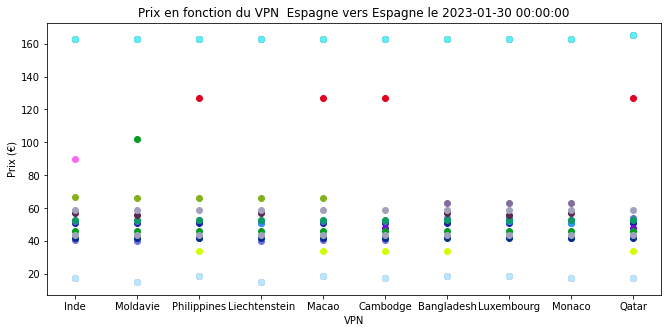

Nb voyage: 29


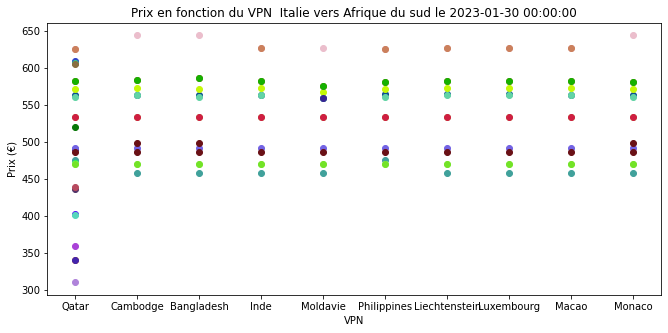

Nb voyage: 17


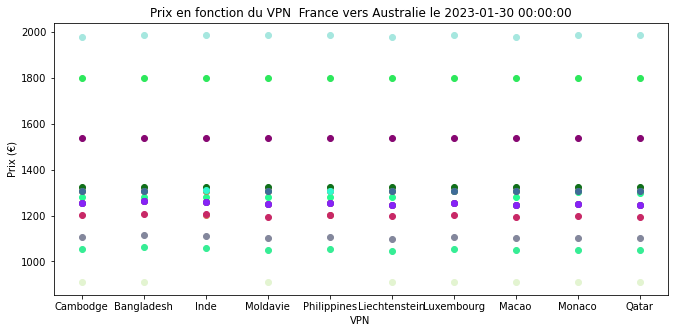

Nb voyage: 21


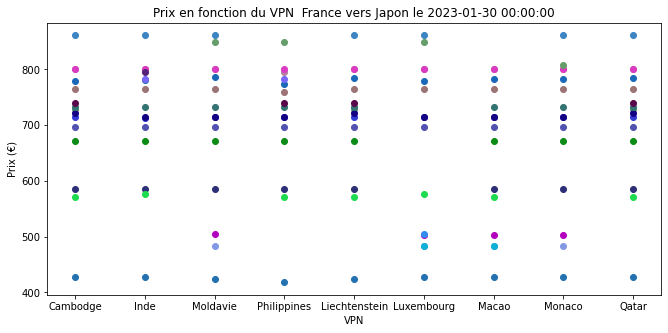

Nb voyage: 16


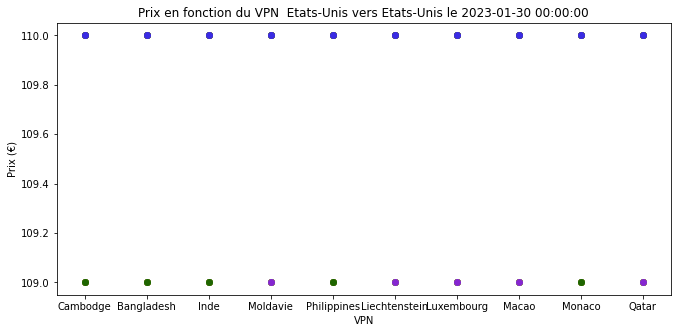

Nb voyage: 16


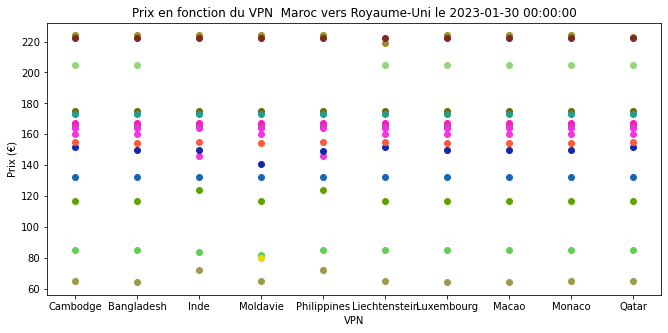

Nb voyage: 17


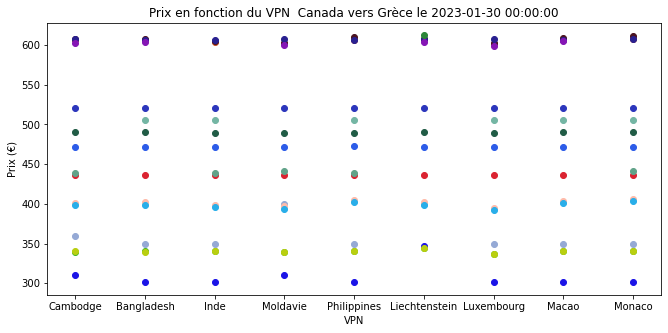

Nb voyage: 17


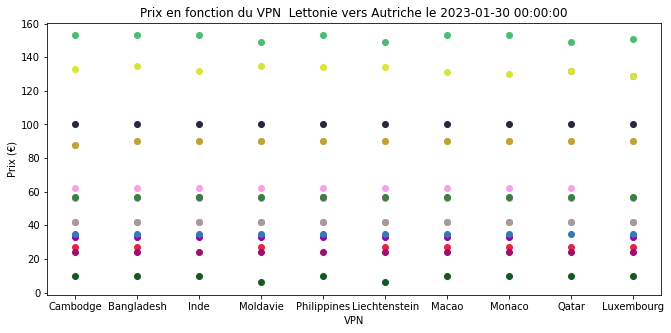

Nb voyage: 15


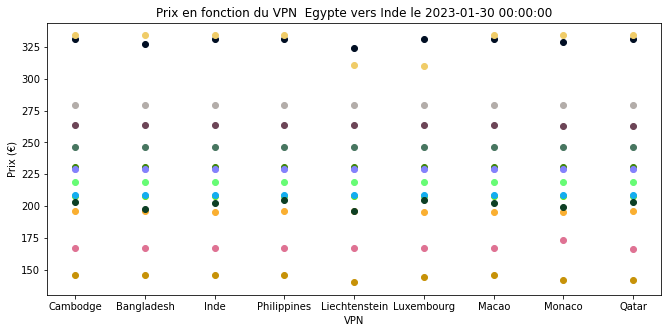

Nb voyage: 16


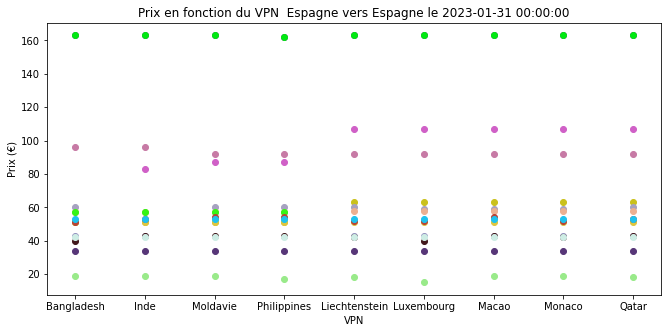

Nb voyage: 18


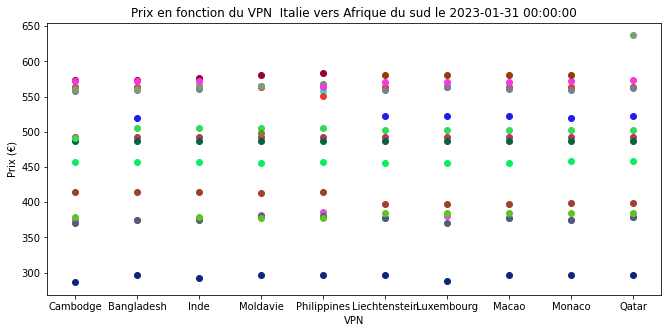

Nb voyage: 42


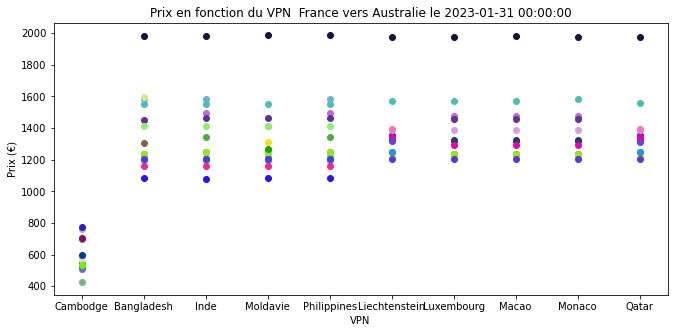

Nb voyage: 19


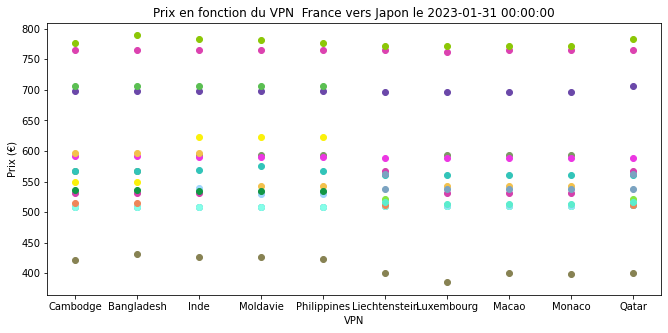

Nb voyage: 33


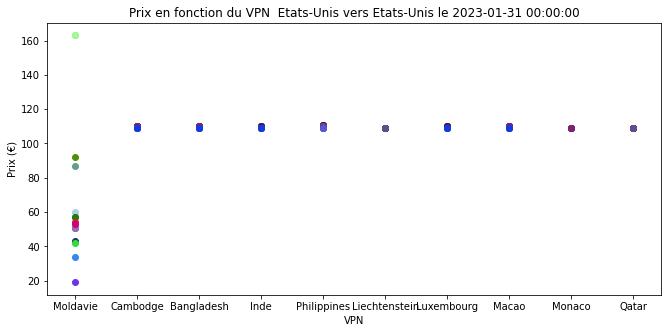

Nb voyage: 17


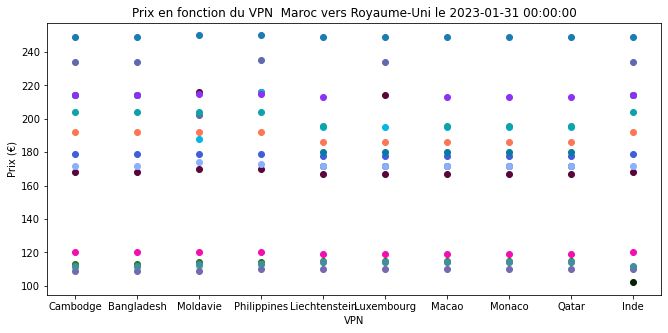

Nb voyage: 19


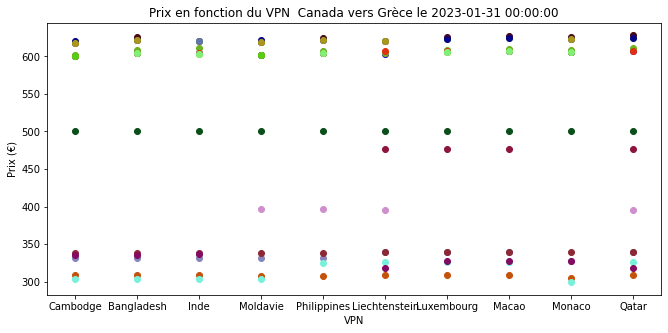

Nb voyage: 17


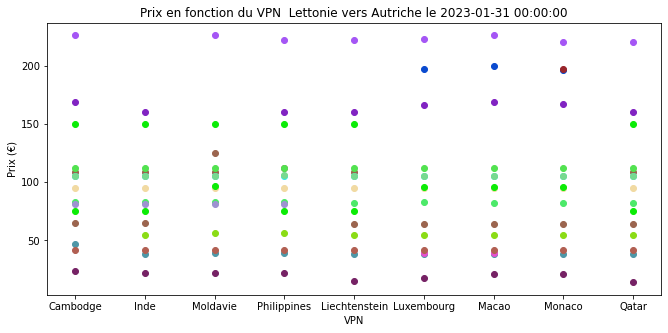

Nb voyage: 18


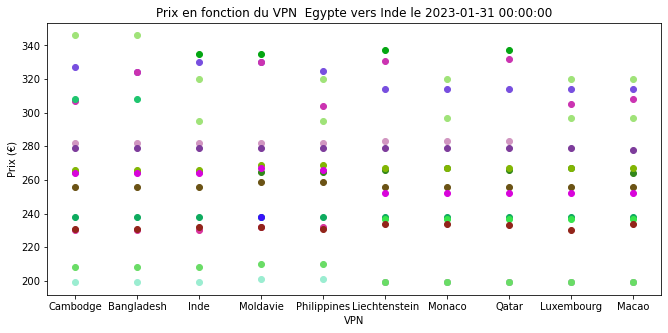

In [156]:
for j in range(len(df_sorted_nb_vols)):
    print("Nb voyage:", df_sorted_nb_vols["Temps de vol"][j])
    fig = plt.figure(1, figsize=(11, 5))
    nombre_de_vols = int(df_sorted_nb_vols["Temps de vol"][j])

    depart= df_sorted_nb_vols["Depart_pays"][j]
    arrive= df_sorted_nb_vols["Arrivé_pays"][j]
    date = df_sorted_nb_vols["Date"][j]

    if j==0:
        ancien_count = 0
        nouveau_count = nombre_de_vols
    
    else:
        ancien_count = nouveau_count
        nouveau_count = ancien_count + nombre_de_vols


    for i in range(ancien_count, nouveau_count):

        # Récupérer les valeurs de VPN et de prix de votre dataset
        vpns = df_sorted["VPN"][i]
        prices = df_sorted["Prix"][i]
        sorted(prices) 
        couleur = random_color()

        # Tracer un nuage de points avec plt
        plt.scatter(vpns, prices, c = couleur)

        # Ajouter un titre et des étiquettes aux axes
        title= 'Prix en fonction du VPN '+ str(depart) +" vers"+ str(arrive) + " le "+ str(date)
        plt.title(title)
        plt.xlabel('VPN')
        plt.ylabel('Prix (€)')
        
    # Afficher le graphique
    plt.show()



### Pour visualiser le prix moyen en fonction du VPN - legende voyage

Text(0, 0.5, 'Prix (€)')

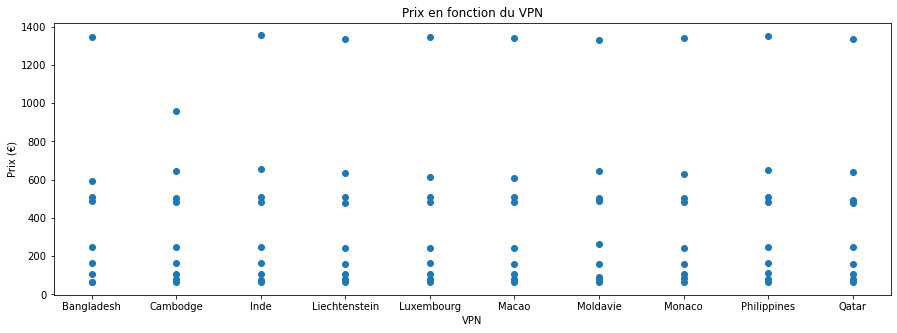

In [105]:
fig = plt.figure(1, figsize=(15, 5))

plt.scatter(df_sorted_by_trip["VPN"], df_sorted_by_trip["Prix"])
plt.title("Prix en fonction du VPN")
plt.xlabel('VPN')
plt.ylabel('Prix (€)')

Mettre condition Si ce voyage alors tel couleur

In [106]:
def color(val):
    if val == ' Espagne to Espagne':
        color = 'red'
    elif val == ' Italie to Afrique du sud':
        color = 'green'
    elif val == ' France to Australie':
        color = 'yellow'
    elif val == ' France to Japon':
        color = 'orange'
    elif val == ' Etats-Unis to Etats-Unis':
        color = 'magenta'
    elif val == ' Maroc to Royaume-Uni':
        color = 'aqua'
    elif val == ' Canada to Grèce':
        color = 'blue'
    elif val == ' Lettonie to Autriche':
        color = 'black'
    elif val == ' Egypte to Inde':
        color = 'brown'    
    return color

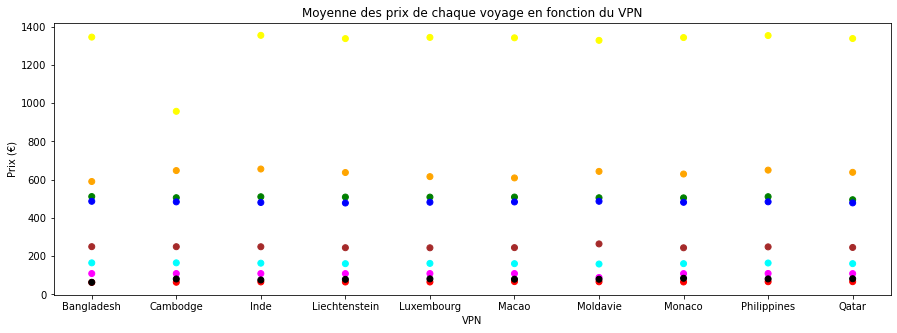

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# Créer un objet Figure et un sous-ensemble d'objets Axes
fig, ax = plt.subplots(figsize=(15, 5))

# Tracer le nuage de points en utilisant la séquence de couleurs
list_couleur = df_sorted_by_trip["Depart_Arrive"].apply(color)
scatter = ax.scatter(df_sorted_by_trip["VPN"], df_sorted_by_trip["Prix"], c=list_couleur)

# Ajouter un titre et des étiquettes aux axes
ax.set_title("Moyenne des prix de chaque voyage en fonction du VPN")
ax.set_xlabel('VPN')
ax.set_ylabel('Prix (€)')

# Afficher le graphique
plt.show()

### Evolution du prix moyen VS PIB

#### Scatterplot

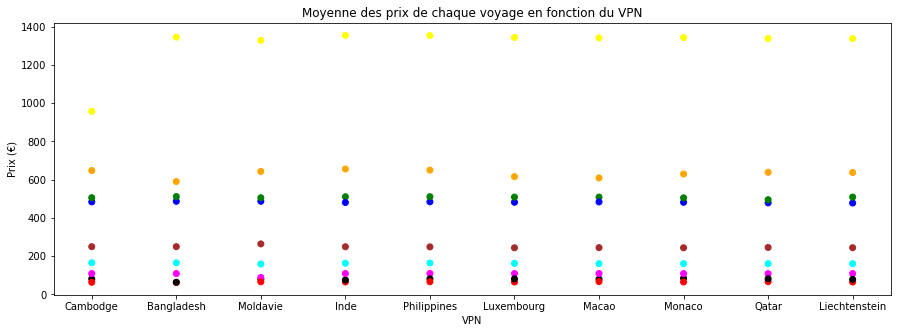

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# Créer un objet Figure et un sous-ensemble d'objets Axes
fig, ax = plt.subplots(figsize=(15, 5))

# Tracer le nuage de points en utilisant la séquence de couleurs
list = df_sorted_by_trip_and_PIB["Depart_Arrive"].apply(color)
scatter = ax.scatter(df_sorted_by_trip_and_PIB["VPN"], df_sorted_by_trip_and_PIB["Prix"], c=list)

# Ajouter un titre et des étiquettes aux axes
ax.set_title("Moyenne des prix de chaque voyage en fonction du VPN")
ax.set_xlabel('VPN')
ax.set_ylabel('Prix (€)')

# Afficher le graphique
plt.show()

#### Boxplot

In [109]:
df_pib = pd.read_excel("data/PIB_annuel_et_PPA_par_pays_utile.xlsx")
df_pib_head = df_pib.head(5)
df_pib_tail = df_pib.tail(5)
df_pib = pd.concat([df_pib_head, df_pib_tail]).reset_index()
df_pib=df_pib.drop("index",axis=1)
# convert $ to €
df_pib["PIB par habitant (€)"] = df_pib["PIB par habitant ($)"] * 0.84
df_pib=df_pib.drop("PIB par habitant ($)",axis=1)
df_pib

,Pays,PIB par habitant (€)
0,Cambodge,3360.0
1,Bangladesh,3528.0
2,Moldavie,4788.0
3,Inde,6048.0
4,Philippines,6888.0
5,Luxembourg,91644.0
6,Macao,96096.0
7,Monaco,97188.0
8,Qatar,104916.0
9,Liechtenstein,116844.0


In [117]:
df_sorted_by_trip_and_PIB

,VPN,Depart,Arrivé,Depart_Arrive,PIB par habitant (€),Prix
0,Cambodge,"Aéroport de Paris Charles de Gaulle, Paris, Fr...","Aéroport international de Narita, Tokyo, Japon",France to Japon,3360.0,647.833333
1,Cambodge,"Aéroport international du Caire, Le Caire, Egypte","Chhatrapati Shivaji International Airport, Mum...",Egypte to Inde,3360.0,249.900000
2,Cambodge,"Aéroport international de Riga, Riga, Lettonie","Vienna Schwechat International Airport, Vienne...",Lettonie to Autriche,3360.0,81.266667
3,Cambodge,"Aéroport international Pearson de Toronto, Tor...",Aéroport international d'Athènes Elefthérios-V...,Canada to Grèce,3360.0,484.200000
4,Cambodge,Aéroport international Mohammed-V de Casablanc...,"Aéroport international de Gatwick, Londres, An...",Maroc to Royaume-Uni,3360.0,165.533333
...,...,...,...,...,...,...
85,Liechtenstein,"Aéroport international Pearson de Toronto, Tor...",Aéroport international d'Athènes Elefthérios-V...,Canada to Grèce,116844.0,478.241379
86,Liechtenstein,"Aéroport international de Riga, Riga, Lettonie","Vienna Schwechat International Airport, Vienne...",Lettonie to Autriche,116844.0,79.200000
87,Liechtenstein,"Aéroport international du Caire, Le Caire, Egypte","Chhatrapati Shivaji International Airport, Mum...",Egypte to Inde,116844.0,244.633333
88,Liechtenstein,"Aéroport Léonard de Vinci de Rome-Fiumicino, R...","Aéroport international OR Tambo, Johannesbourg...",Italie to Afrique du sud,116844.0,509.300000


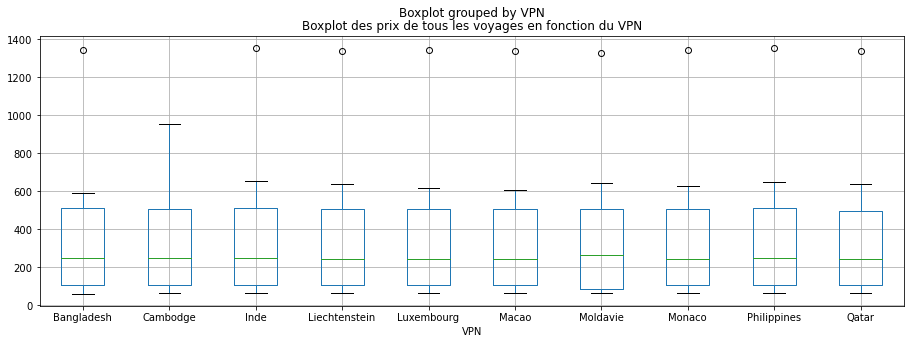

In [110]:
# boxplot of the data
df_sorted_by_trip_and_PIB.boxplot(column=['Prix'], by='VPN', figsize=(15, 5))
plt.title("Boxplot des prix de tous les voyages en fonction du VPN")
plt.show()


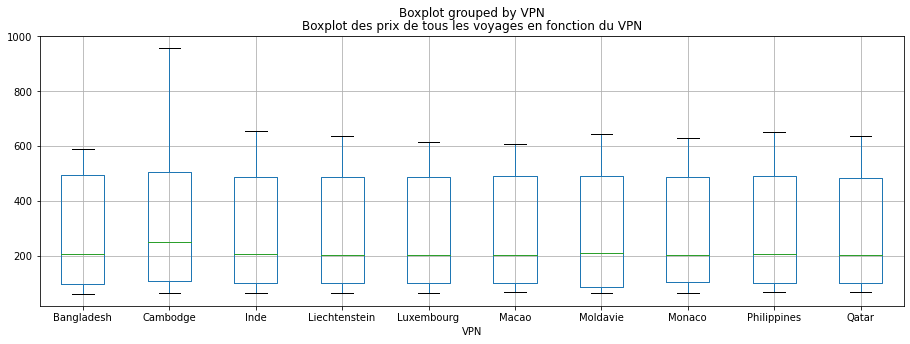

In [111]:
# remove outliers
df_sorted_by_trip_and_PIB_outliner = df_sorted_by_trip_and_PIB[df_sorted_by_trip_and_PIB["Prix"] < 1000]
df_sorted_by_trip_and_PIB_outliner.boxplot(column=['Prix'], by='VPN', figsize=(15, 5))
plt.title("Boxplot des prix de tous les voyages en fonction du VPN")
plt.show()

#### Lines

In [114]:
# get the median of each VPN
df_median_by_vpn = df_sorted_by_trip_and_PIB.groupby('VPN').median().reset_index()
# rename the column "Prix" to "median"
df_median_by_vpn = df_median_by_vpn.rename(columns={"Prix": "median price"})
# get the mean of each VPN
df_mean_by_vpn = df_sorted_by_trip_and_PIB.groupby('VPN').mean().reset_index()
# add the mean to df_median_by_vpn
df_median_by_vpn["mean price"] = df_mean_by_vpn["Prix"]

# Trier les données en fonction du PIB par habitant
df_median_by_vpn.sort_values(by='PIB par habitant (€)', inplace=True)

df_median_by_vpn

,VPN,PIB par habitant (€),median price,mean price
1,Cambodge,3360.0,249.900000,362.870370
0,Bangladesh,3528.0,250.066667,398.555556
6,Moldavie,4788.0,264.466667,402.659259
2,Inde,6048.0,249.600000,407.454534
8,Philippines,6888.0,248.966667,407.916986
4,Luxembourg,91644.0,244.166667,401.640741
5,Macao,96096.0,245.033333,400.840741
7,Monaco,97188.0,244.200000,402.774074
9,Qatar,104916.0,245.866667,401.881658
3,Liechtenstein,116844.0,244.633333,402.493487


<AxesSubplot:xlabel='VPN'>

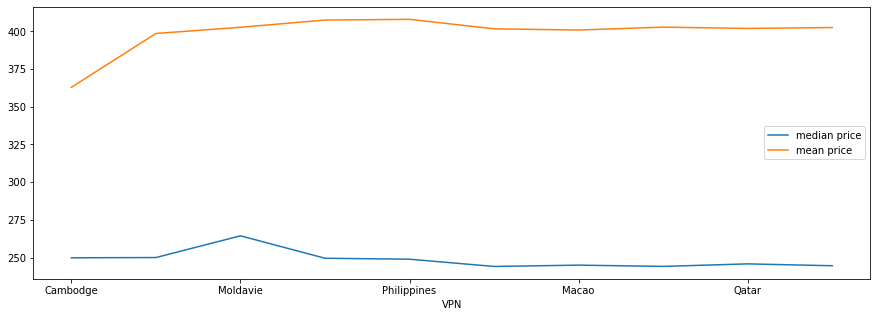

In [115]:
# create a histogram of the median price and mean price depending on the same VPN
df_median_by_vpn.plot(x="VPN", y=["median price", "mean price"], figsize=(15, 5))


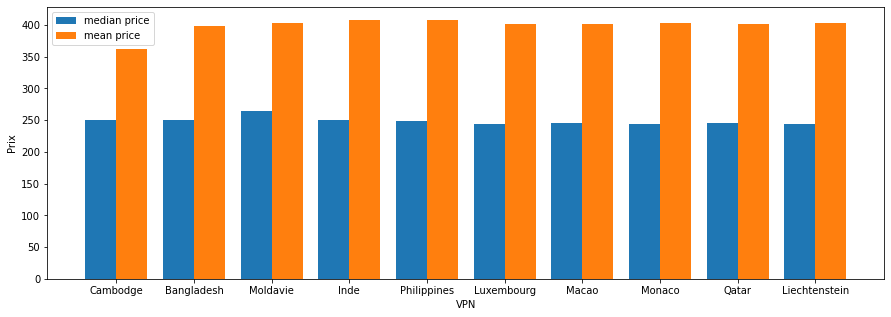

In [116]:
# Create the horizontal positions for the bars
x_pos = np.arange(len(df_median_by_vpn))

fig = plt.figure(1, figsize=(15, 5))
# Create the bar chart
bar_width = 0.4
plt.bar(x_pos, df_median_by_vpn['median price'], bar_width, label='median price')
plt.bar(x_pos + bar_width, df_median_by_vpn['mean price'], bar_width, label='mean price')

# Set the x-axis labels
plt.xticks(x_pos + bar_width / 2, df_median_by_vpn['VPN'])
plt.xlabel('VPN')
plt.ylabel('Prix')
plt.legend()
plt.show()


## Correlation

In [133]:
correlation = df_sorted_by_trip_and_PIB[['PIB par habitant (€)','Prix']].corr()
print(correlation)

                      PIB par habitant (€)      Prix
PIB par habitant (€)              1.000000  0.008451
Prix                              0.008451  1.000000
